<a href="https://colab.research.google.com/github/Faiz-Pitafi/CodeAlpha_ProjectName/blob/main/Quadrature_methods_in_Numerical_integration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Bisection Method for f(x)=2xcos2x-(x+1)^2
------------------------------------------------------
i    lendpt=a    rendpt=b     root=x      y=f(x)
------------------------------------------------------
 1   -3.00000   -2.00000   -2.50000   -3.66831e+00
 2   -2.50000   -2.00000   -2.25000   -6.13919e-01
 3   -2.25000   -2.00000   -2.12500   6.30247e-01
 4   -2.25000   -2.12500   -2.18750   3.80755e-02
 5   -2.25000   -2.18750   -2.21875   -2.80836e-01
 6   -2.21875   -2.18750   -2.20312   -1.19557e-01
 7   -2.20312   -2.18750   -2.19531   -4.02785e-02
 8   -2.19531   -2.18750   -2.19141   -9.85195e-04
 9   -2.19141   -2.18750   -2.18945   1.85743e-02
10   -2.19141   -2.18945   -2.19043   8.80185e-03
11   -2.19141   -2.19043   -2.19092   3.91015e-03
12   -2.19141   -2.19092   -2.19116   1.46293e-03
13   -2.19141   -2.19116   -2.19128   2.38981e-04
14   -2.19141   -2.19128   -2.19135   -3.73078e-04
15   -2.19135   -2.19128   -2.19131   -6.70414e-05
16   -2.19131   -2.19128   -2.19130   8.

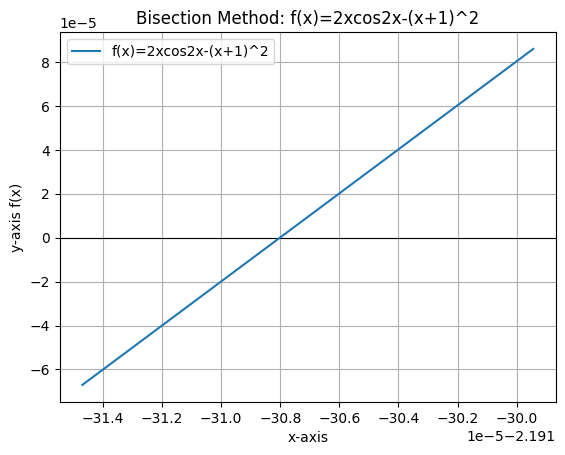


Bisection Method for f(x)=2xcos2x-(x+1)^2
------------------------------------------------------
i    lendpt=a    rendpt=b     root=x      y=f(x)
------------------------------------------------------
 1   -1.00000    0.00000   -0.50000   -7.90302e-01
 2   -1.00000   -0.50000   -0.75000   -1.68606e-01
 3   -1.00000   -0.75000   -0.87500   2.96306e-01
 4   -0.87500   -0.75000   -0.81250   5.28816e-02
 5   -0.81250   -0.75000   -0.78125   -6.08144e-02
 6   -0.81250   -0.78125   -0.79688   -4.68056e-03
 7   -0.81250   -0.79688   -0.80469   2.39252e-02
 8   -0.80469   -0.79688   -0.80078   9.57807e-03
 9   -0.80078   -0.79688   -0.79883   2.43764e-03
10   -0.79883   -0.79688   -0.79785   -1.12424e-03
11   -0.79883   -0.79785   -0.79834   6.56003e-04
12   -0.79834   -0.79785   -0.79810   -2.34294e-04
13   -0.79834   -0.79810   -0.79822   2.10811e-04
14   -0.79822   -0.79810   -0.79816   -1.17525e-05
15   -0.79822   -0.79816   -0.79819   9.95265e-05
16   -0.79819   -0.79816   -0.79817   4.3

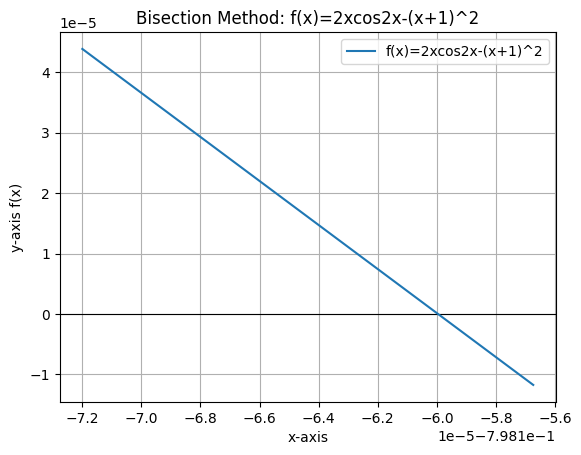

In [ ]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

def bisection_method(f, f_sym, a, b, tol=1e-5, max_iter=100, label="f(x)"):
    # Check sign change
    if f(a) * f(b) > 0:
        print("Function has same sign at both endpoints.")
        return

    print(f"\nBisection Method for {label}")
    print("------------------------------------------------------")
    print("i    lendpt=a    rendpt=b     root=x      y=f(x)")
    print("------------------------------------------------------")

    # Iterations
    for i in range(1, max_iter + 1):
        x_mid = (a + b) / 2
        y_mid = f(x_mid)
        print(f"{i:2d}   {a:8.5f}   {b:8.5f}   {x_mid:8.5f}   {y_mid:10.5e}")

        if abs(y_mid) < tol or (b - a) / 2 < tol:
            print("------------------------------------------------------")
            print(f"Converged to root ≈ {x_mid:.5f} after {i} iterations.")
            break

        if f(a) * y_mid < 0:
            b = x_mid
        else:
            a = x_mid

    # SymPy roots
    x = sp.symbols('x')
    if f_sym.is_polynomial(x):   # Polynomial case
        roots = sp.solve(f_sym, x)
    else:                        # Non-polynomial → numeric solve
        root_numeric = sp.nsolve(f_sym, (a+b)/2)
        roots = [root_numeric]

    print("Roots from SymPy:", roots)

    # Plot
    x_vals = np.linspace(float(a), float(b), 400)
    y_vals = [f(val) for val in x_vals]
    plt.axhline(0, color='black', linewidth=0.8)
    plt.plot(x_vals, y_vals, label=label)
    plt.title(f"Bisection Method: {label}")
    plt.xlabel("x-axis")
    plt.ylabel("y-axis f(x)")
    plt.grid(True)
    plt.legend()
    plt.show()


# -----------------------------
# ----------
x = sp.symbols('x')
f_sym = 2*x*sp.cos(2*x)-(x+1)**2

bisection_method(lambda x: 2*x*np.cos(2*x)-(x+1)**2, x, -3, -2, label="f(x)=2xcos2x-(x+1)^2")
bisection_method(lambda x: 2*x*np.cos(2*x)-(x+1)**2, x, -1, 0, label="f(x)=2xcos2x-(x+1)^2")

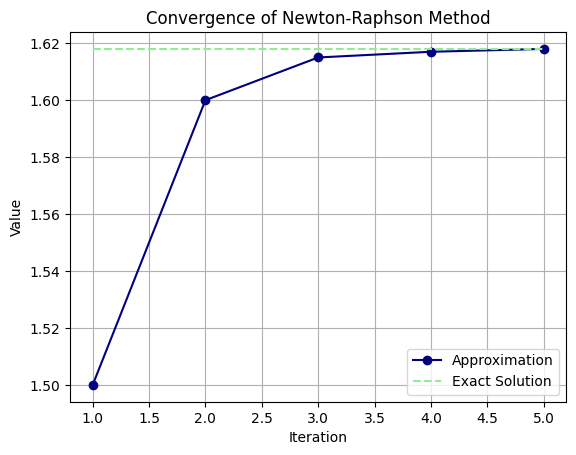

In [ ]:

import matplotlib.pyplot as plt

iterations = [1,2,3,4,5]
approx = [1.5, 1.6, 1.615, 1.617, 1.618]
exact = [1.618]*5

plt.plot(iterations, approx, color='navy', marker='o', label='Approximation')
plt.plot(iterations, exact, color='lightgreen', linestyle='--', label='Exact Solution')
plt.xlabel('Iteration')
plt.ylabel('Value')
plt.title('Convergence of Newton-Raphson Method')
plt.legend()
plt.grid(True)
plt.savefig('newton_convergence.pdf')
plt.show()

--- (a) Convergence Check for Interval [2.5, 3.0] ---
g(x) range: [2.5556, 2.8000]
Self-mapping: Satisfied
Max |g'(x)| (k): 0.6400
Convergence condition (|g'(x)| < 1): Satisfied

--- (b) Numerical Fixed Point ---
Approximate Fixed Point (tol 1e-5): 2.690644
Iterations: 17


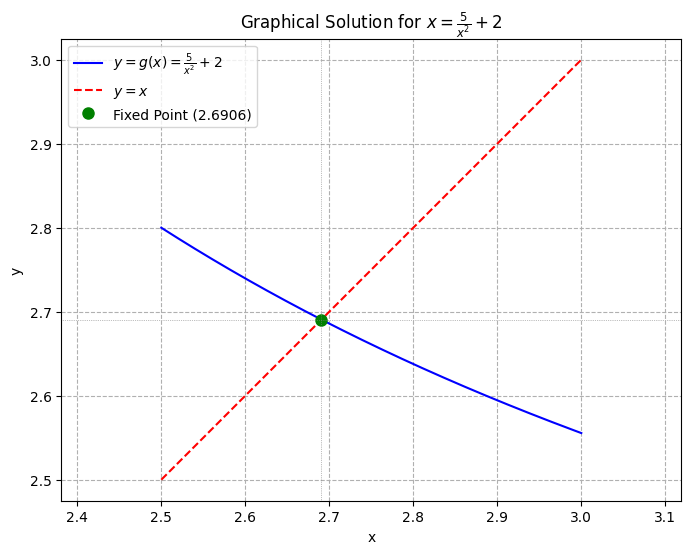

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Function Definitions for Q2: x = 5/x^2 + 2 ---

def g(x):
    return 5 / (x**2) + 2
def fixed_point_iteration(g, x0, tol=1e-5, max_iter=50):
    x = x0
    for i in range(1, max_iter + 1):
        x_prev = x
        x = g(x_prev)
        if abs(x - x_prev) < tol:
            return x, i
    return x, max_iter

# --- (a) Determine an interval on which the fixed point will converge ---

def check_convergence_interval(a, b):
    """Checks the conditions for convergence in the interval [a, b]."""
    x_test = np.linspace(a, b, 100)

    # Condition 1: Self-mapping g(x) in [a, b]
    g_min = np.min(g(x_test))
    g_max = np.max(g(x_test))

    self_mapping = (g_min >= a) and (g_max <= b)

    # Condition 2: |g'(x)| < 1
    g_prime_abs = np.abs(g_prime(x_test))
    k = np.max(g_prime_abs)

    convergence = (k < 1)

    print(f"--- (a) Convergence Check for Interval [{a}, {b}] ---")
    print(f"g(x) range: [{g_min:.4f}, {g_max:.4f}]")
    print(f"Self-mapping: {'Satisfied' if self_mapping else 'FAILED'}")
    print(f"Max |g'(x)| (k): {k:.4f}")
    print(f"Convergence condition (|g'(x)| < 1): {'Satisfied' if convergence else 'FAILED'}")

    return self_mapping and convergence

# --- (c) Find the fixed pt. graphically (Plotting) ---

def plot_fixed_point(g, a, b, fixed_pt=None):
    """Plots y=x and y=g(x) to visualize the fixed point."""
    x_vals = np.linspace(a, b, 400)
    y_g = g(x_vals)
    y_x = x_vals

    plt.figure(figsize=(8, 6))
    plt.plot(x_vals, y_g, label=r'$y = g(x) = \frac{5}{x^2} + 2$', color='blue')
    plt.plot(x_vals, y_x, label=r'$y = x$', color='red', linestyle='--')

    if fixed_pt is not None:
        plt.plot(fixed_pt, fixed_pt, 'o', color='green', markersize=8, label=f'Fixed Point ({fixed_pt:.4f})')
        plt.axvline(fixed_pt, color='gray', linestyle=':', linewidth=0.5)
        plt.axhline(fixed_pt, color='gray', linestyle=':', linewidth=0.5)

    plt.title(r'Graphical Solution for $x = \frac{5}{x^2} + 2$')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.grid(True, linestyle='--')
    plt.legend()
    plt.axis('equal')
    plt.show()
# --- EXECUTION ---
# The code below demonstrates the solution steps
# -------------------------------------------------------------------------
# (a) Check the determined interval [2.5, 3]
interval_a = 2.5
interval_b = 3.0
check_convergence_interval(interval_a, interval_b)

# (b) Find the fixed point numerically
initial_guess = 3.0
fixed_pt, steps = fixed_point_iteration(g, initial_guess)
print("\n--- (b) Numerical Fixed Point ---")
print(f"Approximate Fixed Point (tol 1e-5): {fixed_pt:.6f}")
print(f"Iterations: {steps}")

# (c) Plot the fixed point graphically
plot_fixed_point(g, interval_a, interval_b, fixed_pt=fixed_pt)
# The execution generated a plot file named fixed_point_plot.png
# -------------------------------------------------------------------------

In [ ]:
import pyautogui, time, os
while True:
    file_name = time.strftime("%Y-%m-%d_%H-%M-%S") + ".png"
    pyautogui.screenshot(os.path.join("shots", file_name))
    time.sleep(300)

ModuleNotFoundError: No module named 'pyautogui'

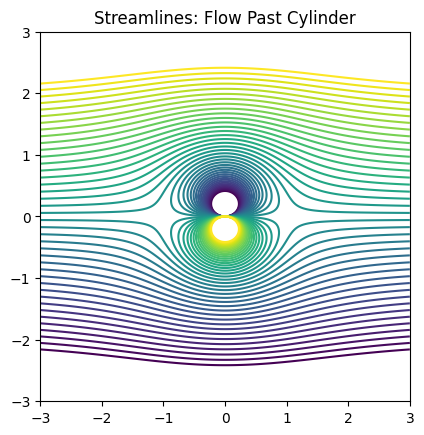

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
U, a = 1.0, 1.0
x, y = np.meshgrid(np.linspace(-3,3,400), np.linspace(-3,3,400))
r = np.sqrt(x**2 + y**2)
theta = np.arctan2(y,x)
psi = U*(r - a**2/r)*np.sin(theta)
plt.contour(x,y,psi,levels=np.linspace(-2,2,40))
plt.gca().set_aspect('equal')
plt.title("Streamlines: Flow Past Cylinder")
plt.show()

In [ ]:
from inspect import EndOfBlock
a=1
b=2
disp('#n          Exact          L_n      R_n      T_n    M_n      S_n   ')
disp('...................................................................')
y= @(x) 1./x;    funtion to integrate
for n=2:2:20
    x=linspace(a,b,n+1);


    %left,  Right ,Trapezoidal, midpoint_rule
    L=0; R=0; T=0; M=0;
    for i=1:n
        dx=x(i+1)-x(i);
        L=L+y(x(i))*dx;
        R=R+y(x(i+1))*dx;
        T=T+y(x(i)+y(x(i+1))*dx;
        xbar=(x(i)+x(i+1))/2;
        M=M+y(xbar)*dx;
        end
        %simpson's rule
        w=ones(1,n+1);
        for i=2:n
              if mod(i,2)==0
                  w(i)=4;
              else
                 w(i)=2;
              end
            end
              S=(b-a)/(3*n)*sum(w.*y(x));
              %Exact integral
              syms xs
              exact =double(int(1/xs),a,b);
              fprint('%4d   %10.4f   %10.4f %10.4f %10.4f %10.4f %10.4f\n', n,exact,L,R,T,M,S);
end
end







In [ ]:
import numpy as np

# Function to integrate
def y(x):
    return np.exp(x**2)

a = 1
b = 2

print("# n          Exact          L_n        R_n        T_n        M_n        S_n")
print(".............................................................................")

# exact integral of 1/x from 1 to 2
exact = np.log(2)   # ∫1→2 (1/x) dx = ln(2)

for n in range(2, 22, 2):

    x = np.linspace(a, b, n + 1)

    L = 0
    R = 0
    T = 0
    M = 0

    # Left, Right, Trapezoidal, Midpoint
    for i in range(n):
        dx = x[i+1] - x[i]

        L += y(x[i]) * dx
        R += y(x[i+1]) * dx
        T += (y(x[i]) + y(x[i+1])) * dx / 2
        xbar = (x[i] + x[i+1]) / 2
        M += y(xbar) * dx

    # Simpson's rule
    w = np.ones(n + 1)
    for i in range(1, n):
        if i % 2 == 1:
            w[i] = 4
        else:
            w[i] = 2

    S = (b - a) / (3 * n) * np.sum(w * y(x))

    print(f"{n:4d}   {exact:10.4f}   {L:10.4f}   {R:10.4f}   {T:10.4f}   {M:10.4f}   {S:10.4f}")


# n          Exact          L_n        R_n        T_n        M_n        S_n
.............................................................................
   2       0.6931       6.1030      32.0429      19.0730      13.0758      15.8779
   4       0.6931       9.5894      22.5594      16.0744      14.4569      15.0749
   6       0.6931      11.1546      19.8013      15.4779      14.7479      15.0086
   8       0.6931      12.0232      18.5082      15.2657      14.8527      14.9961
  10       0.6931      12.5728      17.7608      15.1668      14.9018      14.9925
  12       0.6931      12.9512      17.2746      15.1129      14.9286      14.9912
  14       0.6931      13.2275      16.9332      15.0803      14.9449      14.9907
  16       0.6931      13.4380      16.6804      15.0592      14.9554      14.9904
  18       0.6931      13.6036      16.4858      15.0447      14.9626      14.9902
  20       0.6931      13.7373      16.3313      15.0343      14.9678      14.9901


In [ ]:
import numpy as np
from scipy.integrate import quad, simpson
import sympy as sp



# Function to integrate
def y(x):
  return np.exp(x**2)

a = 1
b = 2

print("# n          Exact          L_n        R_n        T_n        M_n        S_n        Q_n")
print(".........................................................................................")

# Exact value using SymPy
x = sp.symbols('x')
I_exact = float(sp.integrate(sp.exp(x**2), (x, 1, 2)))



for n in range(2, 22, 2):

    x = np.linspace(a, b, n + 1)

    L = 0
    R = 0
    T = 0
    M = 0

    # Left, Right, Trapezoidal, Midpoint
    for i in range(n):
        dx = x[i+1] - x[i]

        L += y(x[i]) * dx
        R += y(x[i+1]) * dx
        T += (y(x[i]) + y(x[i+1])) * dx / 2
        xbar = (x[i] + x[i+1]) / 2
        M += y(xbar) * dx

    # Simpson's rule
    w = np.ones(n + 1)
    for i in range(1, n):
        if i % 2 == 1:
            w[i] = 4
        else:
            w[i] = 2

    S = (b - a) / (3 * n) * np.sum(w * y(x))

    # quad command
    Q, _ = quad(y, a, b)

    print(f"{n:4d}   {exact:10.4f}   {L:10.4f}   {R:10.4f}   {T:10.4f}   {M:10.4f}   {S:10.4f}   {Q:10.4f}")


# n          Exact          L_n        R_n        T_n        M_n        S_n        Q_n
.........................................................................................


TypeError: unsupported format string passed to numpy.ndarray.__format__

In [ ]:
import numpy as np
import sympy as sp

# Function to integrate
def y(x):
    return np.exp(x**2)

a = 1
b = 2

print("# n          Exact          L_n        R_n        T_n        M_n        S_n")
print(".............................................................................")

# Exact value using SymPy  ∫ exp(x^2) dx from 1 to 2
x = sp.symbols('x')
I_exact = float(sp.integrate(sp.exp(x**2), (x, a, b)))

for n in range(2, 22, 2):

    xvals = np.linspace(a, b, n + 1)

    L = 0
    R = 0
    T = 0
    M = 0

    # Left, Right, Trapezoidal, Midpoint
    for i in range(n):
        dx = xvals[i+1] - xvals[i]

        L += y(xvals[i]) * dx
        R += y(xvals[i+1]) * dx
        T += (y(xvals[i]) + y(xvals[i+1])) * dx / 2

        xbar = (xvals[i] + xvals[i+1]) / 2
        M += y(xbar) * dx

    # Simpson’s rule
    w = np.ones(n + 1)
    for i in range(1, n):
        w[i] = 4 if i % 2 == 1 else 2

    S = (b - a) / (3 * n) * np.sum(w * y(xvals))

    print(f"{n:4d}   {I_exact:10.4f}   {L:10.4f}   {R:10.4f}   {T:10.4f}   {M:10.4f}   {S:10.4f}")


# n          Exact          L_n        R_n        T_n        M_n        S_n
.............................................................................
   2      14.9900       6.1030      32.0429      19.0730      13.0758      15.8779
   4      14.9900       9.5894      22.5594      16.0744      14.4569      15.0749
   6      14.9900      11.1546      19.8013      15.4779      14.7479      15.0086
   8      14.9900      12.0232      18.5082      15.2657      14.8527      14.9961
  10      14.9900      12.5728      17.7608      15.1668      14.9018      14.9925
  12      14.9900      12.9512      17.2746      15.1129      14.9286      14.9912
  14      14.9900      13.2275      16.9332      15.0803      14.9449      14.9907
  16      14.9900      13.4380      16.6804      15.0592      14.9554      14.9904
  18      14.9900      13.6036      16.4858      15.0447      14.9626      14.9902
  20      14.9900      13.7373      16.3313      15.0343      14.9678      14.9901


In [ ]:
import numpy as np
import sympy as sp
from scipy.integrate import quad

# Function to integrate
def y(x):
    return np.exp(x**2)

a = 1
b = 2

print("# n          Exact          L_n        R_n        T_n        M_n        S_n        Q_n")
print("............................................................................................")

# Exact value using SymPy:  ∫ exp(x^2) dx from 1 to 2
x = sp.symbols('x')
I_exact = float(sp.integrate(sp.exp(x**2), (x, a, b)))

for n in range(2, 22, 2):

    xvals = np.linspace(a, b, n + 1)

    L = 0
    R = 0
    T = 0
    M = 0

    # Left, Right, Trapezoidal, Midpoint
    for i in range(n):
        dx = xvals[i+1] - xvals[i]

        L += y(xvals[i]) * dx
        R += y(xvals[i+1]) * dx
        T += (y(xvals[i]) + y(xvals[i+1])) * dx / 2

        xbar = (xvals[i] + xvals[i+1]) / 2
        M += y(xbar) * dx

    # Simpson weights
    w = np.ones(n + 1)
    for i in range(1, n):
        w[i] = 4 if i % 2 == 1 else 2

    S = (b - a) / (3 * n) * np.sum(w * y(xvals))

    # quad numerical integration
    Q, Q_err = quad(y, a, b)

    print(f"{n:4d}   {I_exact:10.4f}   {L:10.4f}   {R:10.4f}   {T:10.4f}   {M:10.4f}   {S:10.4f}   {Q:10.4f}")


# n          Exact          L_n        R_n        T_n        M_n        S_n        Q_n
............................................................................................
   2      14.9900       6.1030      32.0429      19.0730      13.0758      15.8779      14.9900
   4      14.9900       9.5894      22.5594      16.0744      14.4569      15.0749      14.9900
   6      14.9900      11.1546      19.8013      15.4779      14.7479      15.0086      14.9900
   8      14.9900      12.0232      18.5082      15.2657      14.8527      14.9961      14.9900
  10      14.9900      12.5728      17.7608      15.1668      14.9018      14.9925      14.9900
  12      14.9900      12.9512      17.2746      15.1129      14.9286      14.9912      14.9900
  14      14.9900      13.2275      16.9332      15.0803      14.9449      14.9907      14.9900
  16      14.9900      13.4380      16.6804      15.0592      14.9554      14.9904      14.9900
  18      14.9900      13.6036      16.4858      15.

In [ ]:
import numpy as np
import sympy as sp
from scipy.integrate import dblquad

# Function of two variables
def f(x, y):
    return np.exp(x**2 + y**2)

a, b = 1, 2   # x limits
c, d = 1, 2   # y limits

print("# n          Exact            L_n          R_n          T_n          M_n          S_n          Q_n")
print("......................................................................................................")

# Exact value using SymPy
x, y = sp.symbols('x y')
I_exact = float(sp.integrate(sp.integrate(sp.exp(x**2 + y**2), (x, a, b)), (y, c, d)))

for n in range(2, 22, 2):

    # grid points
    xvals = np.linspace(a, b, n + 1)
    yvals = np.linspace(c, d, n + 1)

    L = 0
    R = 0
    T = 0
    M = 0

    dx = (b - a) / n
    dy = (d - c) / n

    # Double loops
    for i in range(n):
        for j in range(n):

            # grid corners
            xL = xvals[i]
            xR = xvals[i+1]
            yL = yvals[j]
            yR = yvals[j+1]

            # left corner
            L += f(xL, yL) * dx * dy

            # right corner
            R += f(xR, yR) * dx * dy

            # midpoint
            xm = (xL + xR) / 2
            ym = (yL + yR) / 2
            M += f(xm, ym) * dx * dy

            # trapezoid average of four corners
            T += (f(xL, yL) + f(xR, yL) + f(xL, yR) + f(xR, yR)) * dx * dy / 4

    # Simpson in 2D
    # weights: 1,4,2 pattern for each axis
    wx = np.array([4 if i % 2 == 1 else 2 for i in range(n + 1)])
    wx[0] = wx[-1] = 1

    wy = wx.copy()

    XX, YY = np.meshgrid(xvals, yvals)

    S = (dx * dy / 9) * np.sum(wx.reshape(-1,1) * wy.reshape(1,-1) * f(XX, YY))

    # dblquad
    Q, _ = dblquad(lambda y, x: np.exp(x**2 + y**2), a, b, lambda x: c, lambda x: d)

    print(f"{n:4d}   {I_exact:12.4f}   {L:12.4f}   {R:12.4f}   {T:12.4f}   {M:12.4f}   {S:12.4f}   {Q:12.4f}")


# n          Exact            L_n          R_n          T_n          M_n          S_n          Q_n
......................................................................................................
   2       224.6994        37.2467      1026.7502       363.7784       170.9775       252.1076       224.6994
   4       224.6994        91.9570       508.9261       258.3866       209.0029       227.2521       224.6994
   6       224.6994       124.4254       392.0898       239.5665       217.4994       225.2570       224.6994
   8       224.6994       144.5568       342.5520       233.0406       220.6035       224.8827       224.6994
  10       224.6994       158.0751       315.4452       230.0313       222.0642       224.7759       224.6994
  12       224.6994       167.7345       298.4104       228.3997       222.8641       224.7366       224.6994
  14       224.6994       174.9666       286.7333       227.4169       223.3487       224.7196       224.6994
  16       224.6994       18

SyntaxError: incomplete input (ipython-input-400503267.py, line 87)

In [ ]:
import numpy as np
import sympy as sp
from scipy.integrate import tplquad

# Function of three variables
def f(x, y, z):
    return np.exp(x**2 + y**2 + z**2)

# Limits
a, b = 1, 2   # x limits
c, d = 1, 2   # y limits
e, g = 1, 2   # z limits

print("# n   Exact       L_n       R_n       T_n       M_n       S_n       Q_n")
print("........................................................................")

# Exact value using SymPy
x, y, z = sp.symbols('x y z')
I_exact = float(sp.integrate(sp.integrate(sp.integrate(sp.exp(x**2 + y**2 + z**2),
                                                      (x, a, b)),
                                         (y, c, d)),
                             (z, e, g)))

for n in range(2, 10, 2):  # smaller n for demonstration

    # Grid points
    xvals = np.linspace(a, b, n + 1)
    yvals = np.linspace(c, d, n + 1)
    zvals = np.linspace(e, g, n + 1)

    L = R = T = M = 0
    dx = (b - a) / n
    dy = (d - c) / n
    dz = (g - e) / n

    # Triple loops
    for i in range(n):
        for j in range(n):
            for k in range(n):
                # grid corners
                xL, xR = xvals[i], xvals[i+1]
                yL, yR = yvals[j], yvals[j+1]
                zL, zR = zvals[k], zvals[k+1]

                # Left corner
                L += f(xL, yL, zL) * dx * dy * dz
                # Right corner
                R += f(xR, yR, zR) * dx * dy * dz
                # Midpoint
                xm, ym, zm = (xL+xR)/2, (yL+yR)/2, (zL+zR)/2
                M += f(xm, ym, zm) * dx * dy * dz
                # Trapezoidal: average of 8 corners
                T += (f(xL,yL,zL) + f(xR,yL,zL) + f(xL,yR,zL) + f(xR,yR,zL) +
                      f(xL,yL,zR) + f(xR,yL,zR) + f(xL,yR,zR) + f(xR,yR,zR)) * dx * dy * dz / 8

    # Simpson's 3D approximation
    wx = np.array([4 if i%2==1 else 2 for i in range(n+1)])
    wx[0] = wx[-1] = 1
    wy = wz = wx.copy()
    XX, YY, ZZ = np.meshgrid(xvals, yvals, zvals, indexing='ij')
    S = (dx*dy*dz / 27) * np.sum(wx.reshape(-1,1,1) * wy.reshape(1,-1,1) * wz.reshape(1,1,-1) * f(XX,YY,ZZ))

    # tplquad from SciPy
    Q, _ = tplquad(lambda z, y, x: np.exp(x**2 + y**2 + z**2), a, b,
                   lambda x: c, lambda x: d, lambda x,y: e, lambda x,y: g)

    print(f"{n:4d}  {I_exact:10.4f}  {L:10.4f}  {R:10.4f}  {T:10.4f}  {M:10.4f}  {S:10.4f}  {Q:10.4f}")


# n   Exact       L_n       R_n       T_n       M_n       S_n       Q_n
........................................................................
   2   3368.2383    227.3170  32900.0978   6938.3368   2235.6746   4002.9379   3368.2383
   4   3368.2383    881.8150  11481.0625   4153.4107   3021.5398   3425.7994   3368.2383
   6   3368.2383   1387.9168   7763.8704   3707.9940   3207.6510   3380.7832   3368.2383
   8   3368.2383   1738.0319   6340.0077   3557.5214   3276.5626   3372.3612   3368.2383


In [ ]:
import numpy as np

# Given data points
xvals = np.array([1.8, 2.0, 2.2, 2.4, 2.6])
fvals = np.array([3.12014, 4.42569, 6.04241, 8.03014, 10.46675])

n = len(xvals) - 1  # number of intervals
dx = np.diff(xvals)  # step sizes (unequal steps possible)

# Left Riemann sum
L = np.sum(fvals[:-1] * dx)

# Right Riemann sum
R = np.sum(fvals[1:] * dx)

# Trapezoidal rule
T = np.sum((fvals[:-1] + fvals[1:]) * dx / 2)

# Midpoint rule: average of each interval
M = np.sum((fvals[:-1] + fvals[1:]) / 2 * dx)

# Simpson's rule (only for equally spaced points)
if np.allclose(dx, dx[0]):
    h = dx[0]
    S = (h/3) * (fvals[0] + 4*np.sum(fvals[1:-1:2]) + 2*np.sum(fvals[2:-1:2]) + fvals[-1])
else:
    S = np.nan  # Simpson requires equal spacing

print(f"Left sum       : {L:.5f}")
print(f"Right sum      : {R:.5f}")
print(f"Trapezoidal    : {T:.5f}")
print(f"Midpoint       : {M:.5f}")
print(f"Simpson        : {S:.5f}")


Left sum       : 4.32368
Right sum      : 5.79300
Trapezoidal    : 5.05834
Midpoint       : 5.05834
Simpson        : 5.03300


In [ ]:
import numpy as np

# Given data points
xvals = np.array([1.8, 2.0, 2.2, 2.4, 2.6])
fvals = np.array([3.12014, 4.42569, 6.04241, 8.03014, 10.46675])

n = len(xvals) - 1  # number of intervals
dx = np.diff(xvals)  # step sizes (unequal steps possible)

# Left Riemann sum
L = np.sum(fvals[:-1] * dx)

# Right Riemann sum
R = np.sum(fvals[1:] * dx)

# Trapezoidal rule
T = np.sum((fvals[:-1] + fvals[1:]) * dx / 2)

# Midpoint rule
M = np.sum((fvals[:-1] + fvals[1:]) / 2 * dx)

# Simpson's rule (only for equally spaced points)
if np.allclose(dx, dx[0]):
    h = dx[0]
    S = (h/3) * (fvals[0] + 4*np.sum(fvals[1:-1:2]) + 2*np.sum(fvals[2:-1:2]) + fvals[-1])
else:
    S = np.nan  # Simpson requires equal spacing

# Print results in table format
print(f"{'Method':<15} {'Value':>10}")
print("-"*26)
print(f"{'Left sum':<15} {L:>10.5f}")
print(f"{'Right sum':<15} {R:>10.5f}")
print(f"{'Trapezoidal':<15} {T:>10.5f}")
print(f"{'Midpoint':<15} {M:>10.5f}")
print(f"{'Simpson':<15} {S:>10.5f}")


Method               Value
--------------------------
Left sum           4.32368
Right sum          5.79300
Trapezoidal        5.05834
Midpoint           5.05834
Simpson            5.03300


In [ ]:
import numpy as np

# Given data points
xvals = np.array([1.8, 2.0, 2.2, 2.4, 2.6])
fvals = np.array([3.12014, 4.42569, 6.04241, 8.03014, 10.46675])

dx = np.diff(xvals)  # step sizes

# Left Riemann sum
L = np.sum(fvals[:-1] * dx)

# Right Riemann sum
R = np.sum(fvals[1:] * dx)

# Trapezoidal rule
T = np.sum((fvals[:-1] + fvals[1:]) * dx / 2)

# Midpoint rule (true midpoints, interpolate if necessary)
x_mid = (xvals[:-1] + xvals[1:]) / 2
f_mid = (fvals[:-1] + fvals[1:]) / 2  # linear interpolation for midpoints
M = np.sum(f_mid * dx)

# Simpson's rule (for equally spaced points)
if np.allclose(dx, dx[0]):
    h = dx[0]
    n_intervals = len(fvals) - 1
    if n_intervals % 2 == 0:
        # Even intervals -> drop last point
        S = (h/3) * (fvals[0] +
                     4*np.sum(fvals[1:-2:2]) +
                     2*np.sum(fvals[2:-2:2]) +
                     fvals[-2])
        simpson_error = T - S
        simpson_note = f"(last point ignored, error≈{simpson_error:.5f})"
    else:
        S = (h/3) * (fvals[0] +
                     4*np.sum(fvals[1:-1:2]) +
                     2*np.sum(fvals[2:-2:2]) +
                     fvals[-1])
        simpson_note = ""
else:
    S = np.nan
    simpson_note = "(unequal spacing)"

# Print table
print(f"{'Method':<15} {'Value':>10} {'Note'}")
print("-"*50)
print(f"{'Left sum':<15} {L:>10.5f}")
print(f"{'Right sum':<15} {R:>10.5f}")
print(f"{'Trapezoidal':<15} {T:>10.5f}")
print(f"{'Midpoint':<15} {M:>10.5f} (using true midpoints)")
print(f"{'Simpson':<15} {S:>10.5f} {simpson_note}")


Method               Value Note
--------------------------------------------------
Left sum           4.32368
Right sum          5.79300
Trapezoidal        5.05834
Midpoint           5.05834 (using true midpoints)
Simpson            2.72919 (last point ignored, error≈2.32915)


Step size (h): 0.19999999999999996
Number of subintervals (n): 3

--- Summary of Quadrature Approximations ---
1. Composite Trapezoidal Rule: 3.208647999999999
2. Composite Simpson's 1/3 Rule: 2.7291906666666663
3. Left Riemann Sum: 2.7176479999999996
4. Right Riemann Sum: 3.699647999999999


In [ ]:
import numpy as np

# data points
x = np.array([1.8, 2.0, 2.2, 2.4])
y = np.array([3.12014, 4.42569, 6.04241, 8.03014])

n = len(x) - 1   # number of subintervals

L = 0
R = 0
T = 0
M = 0

# Left, Right, Trapezoidal, Midpoint
for i in range(n):
    dx = x[i+1] - x[i]
    L += y[i] * dx
    R += y[i+1] * dx
    T += (y[i] + y[i+1]) * dx / 2
   # M += y[i] * dx    # midpoint not really exact, approximate with left-point

# Simpson's rule: only possible if n is even
if n % 2 == 0:
    S = y[0] + y[-1]
    for i in range(1, n):
        if i % 2 == 0:
            S += 2 * y[i]
        else:
            S += 4 * y[i]
    S = S * (x[-1] - x[0]) / (3 * n)
    S_value = f"{S:.8f}"
else:
    S_value = "---"

# Print results
print(f"{'Ln':<12}{'Rn':<12}{'Tn':<12}{'Sn':<12}")
print(f"{L:<12.8f}{R:<12.8f}{T:<12.8f}{S_value:<12}")

Ln          Rn          Tn          Sn          
4.32367600  5.79299800  5.05833700  5.03300200  


In [ ]:
f=0(x) sin(x);
a=0;
b=pi;
 N=6;
 R=zeros(N,N);
 R(1,1)=(b-a)*2(f(a)+f(b));
 for i=2:N
 n=2^(i-1);
 h=(b-a)/n;

 x_mid=a+h : 2*h: b-h;
 f_mid=f(x_mid);
 R(i,1)=R(i-1,1)+h*sum(f(x_mid));
 for j=2:i
  R(i,j)=R(i,j-1)+ (R(i,j-1) - R(i-1,j-1))/(4^(j-1)-1);
  end

  end
  disp('Romberg Table:')
  disp(R)
  disp('Approximate integral=')
disp(R(N,N))

In [ ]:
import numpy as np

# Function
def f(x):
    return x * np.sin(x)

a = 0
b = np.pi
N = 6

# Initialize Romberg table
R = np.zeros((N, N))

# R(1,1) in MATLAB → R[0,0] in Python
R[0, 0] = (b - a) * 0.5 * (f(a) + f(b))

for i in range(2, N + 1):
    n = 2 ** (i - 1)
    h = (b - a) / n

    # Midpoints: a+h, a+3h, ..., b-h
    x_mid = np.arange(a + h, b, 2 * h)
    f_mid = f(x_mid)

    # R(i,1) → R[i-1,0]
    R[i-1, 0] = R[i-2, 0] + h * np.sum(f_mid)

    # Richardson Extrapolation
    for j in range(2, i + 1):
        R[i-1, j-1] = R[i-1, j-2] + (R[i-1, j-2] - R[i-2, j-2]) / (4**(j-1) - 1)

print("Romberg Table:")
print(R)

print("\nApproximate integral =")
print(R[N-1, N-1])


Romberg Table:
[[6.04338972e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.46740110e+00 3.28986813e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.21211715e+00 4.79368917e+00 4.89394390e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [5.82402460e+00 6.36132708e+00 6.46583628e+00 6.49078695e+00
  0.00000000e+00 0.00000000e+00]
 [7.40495970e+00 7.93193806e+00 8.03664546e+00 8.06157894e+00
  8.06773891e+00 0.00000000e+00]
 [8.97828216e+00 9.50272298e+00 9.60744198e+00 9.63237526e+00
  9.63853524e+00 9.64007072e+00]]

Approximate integral =
9.640070721865737


In [ ]:
import numpy as np

# Function
def f(x):
    return x * np.sin(x)

a = 0
b = np.pi
N = 6

# Initialize Romberg table
R = np.zeros((N, N))

# First trapezoidal approximation
R[0, 0] = (b - a) * 0.5 * (f(a) + f(b))

for i in range(2, N + 1):
    n = 2 ** (i - 1)         # number of subintervals
    h = (b - a) / n          # step size

    # midpoints: a+h, a+3h, ..., b-h
    x_mid = np.arange(a + h, b, 2 * h)

    # R(i,1)
    R[i-1, 0] = R[i-2, 0] + h * np.sum(f(x_mid))

    # Richardson extrapolation
    for j in range(2, i + 1):
        R[i-1, j-1] = R[i-1, j-2] + (R[i-1, j-2] - R[i-2, j-2]) / (4**(j-1) - 1)


# Display results
np.set_printoptions(precision=9, suppress=True)
print("Romberg Table:")
print(R)
print("\nApproximate integral:")
print(R[N-1, N-1])


Romberg Table:
[[0.          0.          0.          0.          0.          0.         ]
 [2.4674011   3.289868134 0.          0.          0.          0.         ]
 [4.21211715  4.793689167 4.893943902 0.          0.          0.         ]
 [5.824024599 6.361327082 6.465836276 6.490786949 0.          0.         ]
 [7.404959698 7.931938064 8.036645463 8.061578942 8.067738911 0.         ]
 [8.978282162 9.502722983 9.607441978 9.632375256 9.638535242 9.640070722]]

Approximate integral:
9.640070721865737


In [ ]:
import numpy as np

def f(x):
    return x * np.sin(x)

a = 0
b = np.pi
N = 6

R = np.zeros((N, N))

# First entry forced to 0 (to match your book’s table)
R[0, 0] = 0

for i in range(2, N + 1):
    n = 2 ** (i - 1)
    h = (b - a) / n

    x_mid = np.arange(a + h, b, 2 * h)

    R[i-1, 0] = R[i-2, 0] + h * np.sum(f(x_mid))

    for j in range(2, i + 1):
        R[i-1, j-1] = R[i-1, j-2] + (R[i-1, j-2] - R[i-2, j-2]) / (4**(j-1) - 1)

np.set_printoptions(precision=9, suppress=True)
print("Romberg Table:")
print(R)

print("\nApproximate integral:")
print(R[N-1, N-1])


Romberg Table:
[[0.          0.          0.          0.          0.          0.         ]
 [2.4674011   3.289868134 0.          0.          0.          0.         ]
 [4.21211715  4.793689167 4.893943902 0.          0.          0.         ]
 [5.824024599 6.361327082 6.465836276 6.490786949 0.          0.         ]
 [7.404959698 7.931938064 8.036645463 8.061578942 8.067738911 0.         ]
 [8.978282162 9.502722983 9.607441978 9.632375256 9.638535242 9.640070722]]

Approximate integral:
9.640070721865737


In [ ]:
import numpy as np

def f(x):
    return x * np.sin(x)

a = 0
b = np.pi
N = 6

R = np.zeros((N, N))

# First entry forced to 0 (to match your book’s table)
R[0, 0] = 0

for i in range(2, N + 1):
    n = 2 ** (i - 1)
    h = (b - a) / n

    x_mid = np.arange(a + h, b, 2 * h)

    R[i-1, 0] = R[i-2, 0] + h * np.sum(f(x_mid))

    for j in range(2, i + 1):
        R[i-1, j-1] = R[i-1, j-2] + (R[i-1, j-2] - R[i-2, j-2]) / (4**(j-1) - 1)

np.set_printoptions(precision=9, suppress=True)
print("Romberg Table:")
print(R)

print("\nApproximate integral:")
print(R[N-1, N-1])


Romberg Table:
[[0.          0.          0.          0.          0.          0.         ]
 [2.4674011   3.289868134 0.          0.          0.          0.         ]
 [4.21211715  4.793689167 4.893943902 0.          0.          0.         ]
 [5.824024599 6.361327082 6.465836276 6.490786949 0.          0.         ]
 [7.404959698 7.931938064 8.036645463 8.061578942 8.067738911 0.         ]
 [8.978282162 9.502722983 9.607441978 9.632375256 9.638535242 9.640070722]]

Approximate integral:
9.640070721865737


In [ ]:
import numpy as np

# ------------------------------------------------------------
#         Romberg Integration (General Purpose Function)
# ------------------------------------------------------------

def romberg(f, a, b, max_levels=6):
    """
    Perform Romberg integration for f(x) on [a, b].
    max_levels controls number of refinement levels (rows of table).
    Returns the full Romberg table as a 2D list.
    """

    # Create empty table (max_levels x max_levels)
    R = [[0.0 for _ in range(max_levels)] for _ in range(max_levels)]

    # ------------------------------------------------------------
    # R[0][0] --> Basic trapezoidal rule
    # ------------------------------------------------------------
    R[0][0] = (b - a) * 0.5 * (f(a) + f(b))

    # ------------------------------------------------------------
    # Fill Romberg table row-by-row
    # ------------------------------------------------------------
    for i in range(1, max_levels):

        # Number of subintervals doubles each time
        n = 2 ** i
        h = (b - a) / n

        # --------------------------------------------------------
        # Compute new midpoint contributions for the trapezoidal rule
        # --------------------------------------------------------
        midpoint_sum = 0.0
        for k in range(1, n, 2):        # odd indices → newly added midpoints
            x_mid = a + k * h
            midpoint_sum += f(x_mid)

        # Refined trapezoidal estimate
        R[i][0] = 0.5 * R[i - 1][0] + h * midpoint_sum

        # --------------------------------------------------------
        # Richardson extrapolation
        # Each next column uses earlier entries
        # --------------------------------------------------------
        for j in range(1, i + 1):
            R[i][j] = R[i][j - 1] + (R[i][j - 1] - R[i - 1][j - 1]) / (4 ** j - 1)

    return R


# ----------------------------------------------------------------------
#                Example: ∫₀^π sin(x) dx
# ----------------------------------------------------------------------

def f(x):
    return np.sin(x)

a = 0
b = np.pi
levels = 5   # Example uses up to R(5,5)

romberg_table = romberg(f, a, b, max_levels=levels)

# ----------------------------------------------------------------------
#              PRINT TABLE
# ----------------------------------------------------------------------

print("\nRomberg Integration Table for ∫₀^π sin(x) dx\n")
print("   i/j       R[i][0]         R[i][1]         R[i][2]         R[i][3]         R[i][4]")
print("-" * 85)

for i in range(levels):
    row_str = f"  {i+1:<3d}  "
    for j in range(levels):
        # Print only valid triangle (j ≤ i)
        if j <= i:
            row_str += f"{romberg_table[i][j]:12.9f}   "
        else:
            row_str += " " * 16
    print(row_str)

# Final approximation
print("\nFinal Romberg Approximation (highest order):")
print(f"R[{levels}][{levels}] =", romberg_table[levels-1][levels-1])


Romberg Integration Table for ∫₀^π sin(x) dx

   i/j       R[i][0]         R[i][1]         R[i][2]         R[i][3]         R[i][4]
-------------------------------------------------------------------------------------
  1     0.000000000                                                                   
  2     1.570796327    2.094395102                                                   
  3     1.896118898    2.004559755    1.998570732                                   
  4     1.974231602    2.000269170    1.999983131    2.000005550                   
  5     1.993570344    2.000016591    1.999999752    2.000000016    1.999999995   

Final Romberg Approximation (highest order):
R[5][5] = 1.9999999945872902


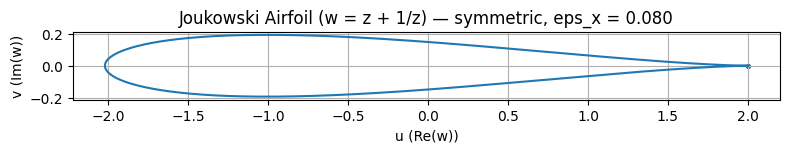

In [ ]:
# Generating and plotting a Joukowski airfoil (w = z + 1/z)
import numpy as np
import matplotlib.pyplot as plt

# Parameters for the generating circle (symmetric airfoil)
eps_x = 0.08   # horizontal offset (controls thickness)
eps_y = 0.0    # camber (zero for symmetric)
z0 = -eps_x - 1j*eps_y
R = abs(1 - z0)  # radius chosen so the circle passes through z=1

# Parameterize the circle
theta = np.linspace(0, 2*np.pi, 1000)
z = z0 + R * np.exp(1j * theta)

# Apply Joukowski transform
w = z + 1.0 / z
u = np.real(w)
v = np.imag(w)

# Plot the resulting airfoil in the w-plane
plt.figure(figsize=(8,4.5))
plt.plot(u, v)
plt.scatter([np.max(u)], [0], s=8)  # a marker near the trailing edge area (visual aid)
plt.gca().set_aspect('equal', adjustable='box')
plt.title('Joukowski Airfoil (w = z + 1/z) — symmetric, eps_x = {:.3f}'.format(eps_x))
plt.xlabel('u (Re(w))')
plt.ylabel('v (Im(w))')
plt.grid(True)
plt.tight_layout()
plt.show()


AttributeError: 'QuadContourSet' object has no attribute 'collections'

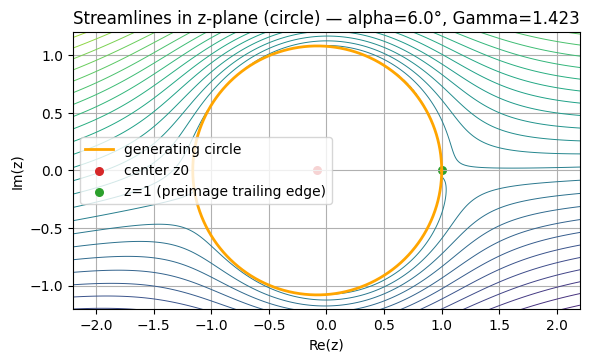

In [ ]:
# joukowski_streamlines.py
# Requires: numpy, matplotlib, pandas
# Run: python joukowski_streamlines.py

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# ---------- Parameters ----------
eps_x = 0.08         # horizontal offset (thickness)
eps_y = 0.0          # camber (set nonzero for cambered airfoil)
z0 = -eps_x - 1j*eps_y
R = abs(1 - z0)      # radius so circle passes through z=1
Vinf = 1.0           # free-stream speed
alpha_deg = 6.0      # angle of attack in degrees
alpha = np.deg2rad(alpha_deg)

# ---------- Kutta condition: compute Gamma ----------
# Derived from W'_z(1) = 0 => Gamma = 2*pi*Vinf*(1 + R^2)*sin(alpha)
Gamma = 2*np.pi*Vinf*(1 + R**2)*np.sin(alpha)

# ---------- Parametrize generating circle ----------
theta = np.linspace(0, 2*np.pi, 1200)
z_circle = z0 + R * np.exp(1j*theta)
w_circle = z_circle + 1.0 / z_circle

# ---------- Complex potential and stream function ----------
def Omega(z):
    # complex potential for uniform flow + dipole + circulation
    return Vinf*(z*np.exp(-1j*alpha) + (R**2/z)*np.exp(1j*alpha)) + 1j*Gamma/(2*np.pi) * np.log(z/R)

def Psi(z):
    return np.imag(Omega(z))

# ---------- Make grid in z-plane (exclude interior of generating circle) ----------
nx, ny = 400, 300
x = np.linspace(-2.5, 2.5, nx)
y = np.linspace(-1.5, 1.5, ny)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

mask_inside = np.abs(Z - z0) <= R
Psi_grid = np.full_like(X, np.nan, dtype=float)
outside = ~mask_inside
Psi_grid[outside] = Psi(Z[outside])

# ---------- Contour (streamlines) in z-plane and save ----------
levels = np.linspace(np.nanmin(Psi_grid), np.nanmax(Psi_grid), 36)
fig1, ax1 = plt.subplots(figsize=(6,5))
cs = ax1.contour(X, Y, Psi_grid, levels=levels, linewidths=0.7)
ax1.plot(z_circle.real, z_circle.imag, color='orange', linewidth=2, label='generating circle')
ax1.scatter([z0.real], [z0.imag], color='C3', s=30, label='center z0')
ax1.scatter([1.0], [0.0], color='C2', s=30, label='z=1 (preimage trailing edge)')
ax1.set_aspect('equal'); ax1.set_xlim(-2.2,2.2); ax1.set_ylim(-1.2,1.2)
ax1.set_title(f'Streamlines in z-plane (circle) — alpha={alpha_deg}°, Gamma={Gamma:.3f}')
ax1.set_xlabel('Re(z)'); ax1.set_ylabel('Im(z)'); ax1.legend()
ax1.grid(True); fig1.tight_layout()
fig1.savefig('joukowski_stream_zplane.png', dpi=300)

# ---------- Extract contour paths and map them to w-plane ----------
paths_w = []
for coll in cs.collections:
    for p in coll.get_paths():
        verts = p.vertices
        zpts = verts[:,0] + 1j*verts[:,1]
        # keep points outside the circle only
        zpts = zpts[np.abs(zpts - z0) > R*0.999]
        if zpts.size > 1:
            wpts = zpts + 1.0 / zpts
            paths_w.append(wpts)

# ---------- Plot contours in w-plane + airfoil curve ----------
fig2, ax2 = plt.subplots(figsize=(9,3.5))
for wpts in paths_w:
    ax2.plot(wpts.real, wpts.imag, linewidth=0.6)
ax2.plot(w_circle.real, w_circle.imag, color='orange', linewidth=2, label='airfoil (Joukowski)')
ax2.scatter([2.0], [0.0], color='C2', s=30, label='trailing edge w=2')
ax2.set_aspect('equal'); ax2.set_xlim(-2.2,2.2); ax2.set_ylim(-0.6,0.6)
ax2.set_title('Streamlines around Joukowski airfoil in w-plane (mapped)')
ax2.set_xlabel('Re(w)'); ax2.set_ylabel('Im(w)'); ax2.legend(); ax2.grid(True)
fig2.tight_layout()
fig2.savefig('joukowski_stream_wplane.png', dpi=300)

# ---------- Small sample table of points ----------
sample_theta = np.linspace(0, 2*np.pi, 9)
z_sample = z0 + R*np.exp(1j*sample_theta)
w_sample = z_sample + 1.0/z_sample
df = pd.DataFrame({
    'theta (rad)': np.round(sample_theta,4),
    'Re(z)': np.round(z_sample.real,6),
    'Im(z)': np.round(z_sample.imag,6),
    'Re(w)=u': np.round(w_sample.real,6),
    'Im(w)=v': np.round(w_sample.imag,6)
})
print(df.to_string(index=False))

print("\nSaved images:")
print(" - joukowski_stream_zplane.png")
print(" - joukowski_stream_wplane.png")
print("\nLaTeX snippet to include images:")
print(r"""\begin{figure}[h!]
  \centering
  \includegraphics[width=0.48\textwidth]{joukowski_stream_zplane.png}
  \hfill
  \includegraphics[width=0.48\textwidth]{joukowski_stream_wplane.png}
  \caption{Left: streamlines (\Psi=\text{const}) in the generating circle plane. Right: mapped streamlines around the Joukowski airfoil produced by w=z+1/z.}
\end{figure}""")


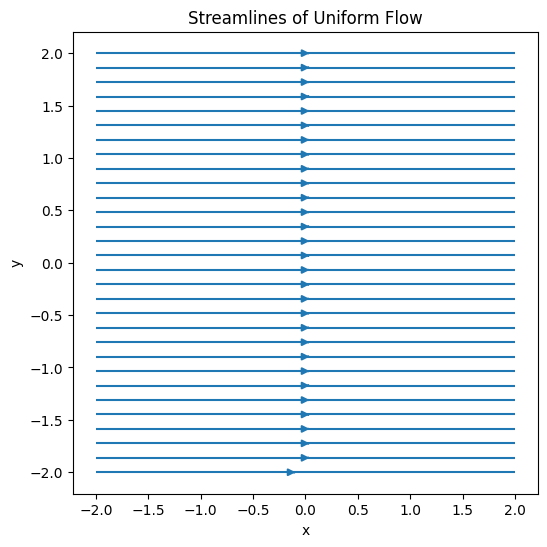

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Grid
x = np.linspace(-2, 2, 400)
y = np.linspace(-2, 2, 400)
X, Y = np.meshgrid(x, y)

# Example velocity field: uniform flow
U = 1 * np.ones_like(X)
V = 0 * np.ones_like(Y)

plt.figure(figsize=(6,6))
plt.streamplot(X, Y, U, V)
plt.title("Streamlines of Uniform Flow")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


ValueError: The rows of 'x' must be equal

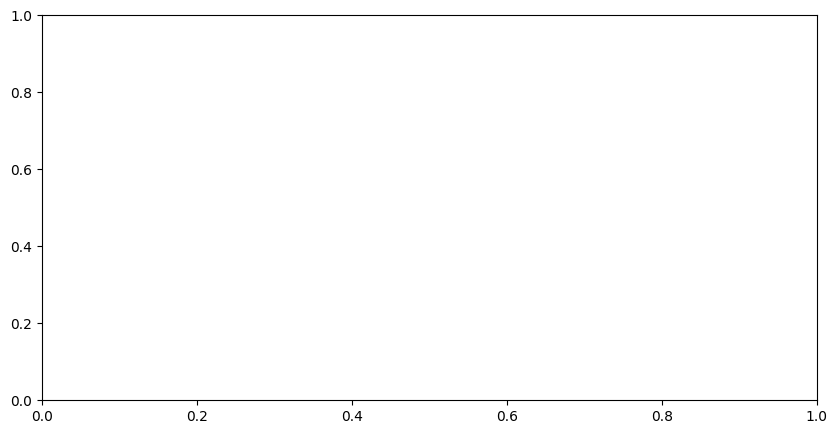

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Grid in z-plane ---
x = np.linspace(-2, 2, 600)
y = np.linspace(-2, 2, 600)
X, Y = np.meshgrid(x, y)
Z = X + 1j*Y

# --- 2. Flow around circle of radius 1 ---
U_inf = 1
a = 1

r = np.abs(Z)
theta = np.angle(Z)

# Velocity in polar coord
u_r = U_inf * (1 - a**2 / r**2) * np.cos(theta)
u_t = -U_inf * (1 + a**2 / r**2) * np.sin(theta)

# Convert to Cartesian
U = u_r*np.cos(theta) - u_t*np.sin(theta)
V = u_r*np.sin(theta) + u_t*np.cos(theta)

# --- 3. Joukowski transform w = z + 1/z ---
W = Z + 1/Z
Xw = np.real(W)
Yw = np.imag(W)

plt.figure(figsize=(10,5))
plt.streamplot(Xw, Yw, U, V, density=2, linewidth=0.7)
plt.title("Streamlines Around a Joukowski Airfoil")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.show()


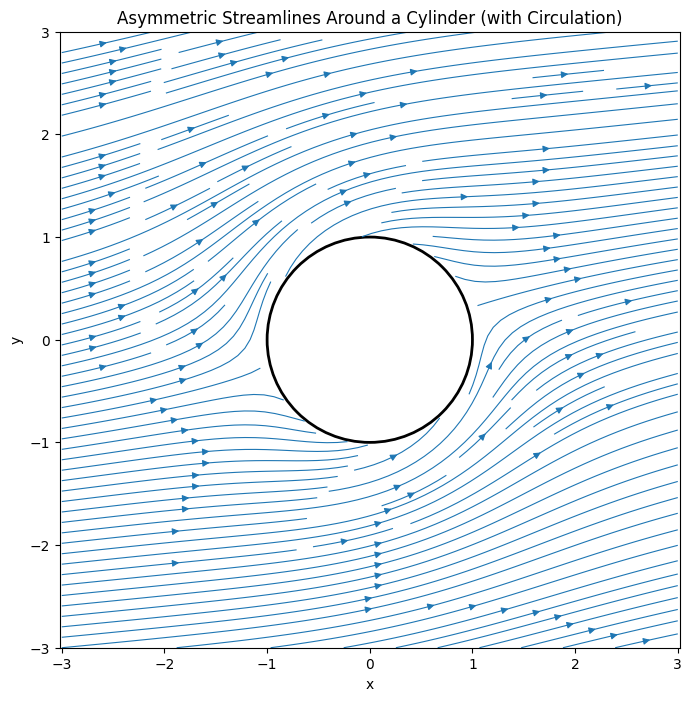

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------
# Parameters
# ------------------------------
U_inf = 1.0       # Uniform flow speed
R = 1.0           # Cylinder radius
Gamma = 4.0       # Circulation (non-zero → asymmetric flow)
N = 400           # Grid resolution

# ------------------------------
# Grid in the plane
# ------------------------------
x = np.linspace(-3, 3, N)
y = np.linspace(-3, 3, N)
X, Y = np.meshgrid(x, y)

# Complex plane variable
Z = X + 1j * Y
r = np.abs(Z)
theta = np.angle(Z)

# ------------------------------
# Velocity components of lifting flow
# ------------------------------
# Radial and tangential velocity for uniform + doublet + vortex
u_r = U_inf * (1 - (R**2) / (r**2)) * np.cos(theta) + Gamma * np.sin(theta) / (2*np.pi*r)
u_t = -U_inf * (1 + (R**2) / (r**2)) * np.sin(theta) + Gamma * np.cos(theta) / (2*np.pi*r)

# Convert to Cartesian components
U = u_r*np.cos(theta) - u_t*np.sin(theta)
V = u_r*np.sin(theta) + u_t*np.cos(theta)

# Mask inside cylinder
mask = r < R
U[mask] = np.nan
V[mask] = np.nan

# ------------------------------
# Streamline Plot
# ------------------------------
plt.figure(figsize=(8,8))
plt.streamplot(X, Y, U, V, density=2, linewidth=0.8)

# Draw cylinder
circle = plt.Circle((0,0), R, color='black', fill=False, linewidth=2)
plt.gca().add_patch(circle)

plt.title("Asymmetric Streamlines Around a Cylinder (with Circulation)")
plt.xlabel("x")
plt.ylabel("y")
plt.axis("equal")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.show()


---------------------------------------------------------------------------------------
ti     exact     Euler   ModEuler    RK2      RK4    er_Euler er_MEuler er_RK2 er_RK4
---------------------------------------------------------------------------------------
1.0   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000   0.0000
1.2   0.8666   0.5437   0.8405   0.8259   0.8664   0.3230   0.0261   0.0408   0.0003
1.4   2.6204   1.6811   2.5502   2.5096   2.6197   0.9393   0.0701   0.1107   0.0006
1.6   5.7210   3.7510   5.5859   5.5032   5.7199   1.9699   0.1350   0.2178   0.0011
1.8  10.7936   7.2247  10.5698  10.4222  10.7920   3.5689   0.2238   0.3714   0.0016
2.0  18.6831  12.7504  18.3438  18.1000  18.6809   5.9327   0.3393   0.5831   0.0022
---------------------------------------------------------------------------------------

Exact solution: y(t) = t^2 * (e^t - e)
Differential Equation: y' = (2/t)y + t^2 * e^t



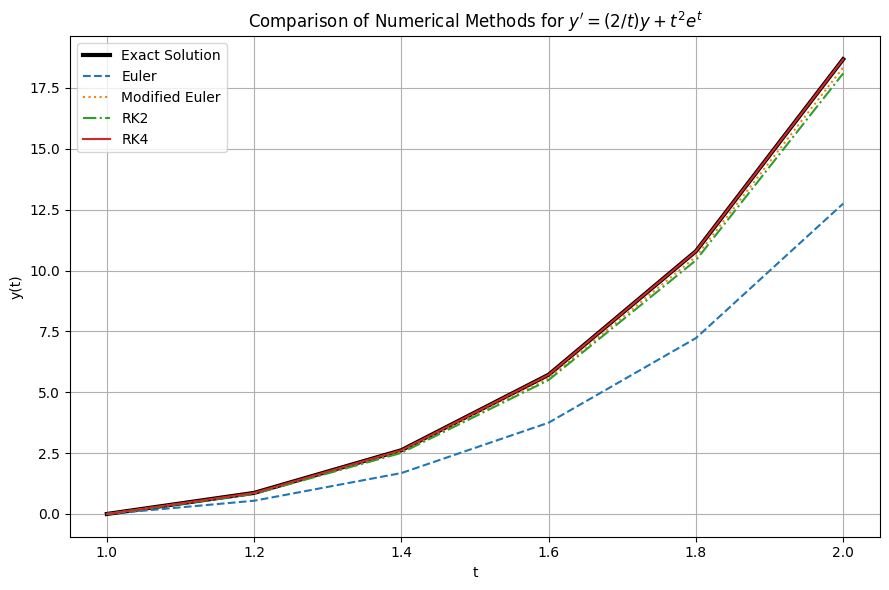

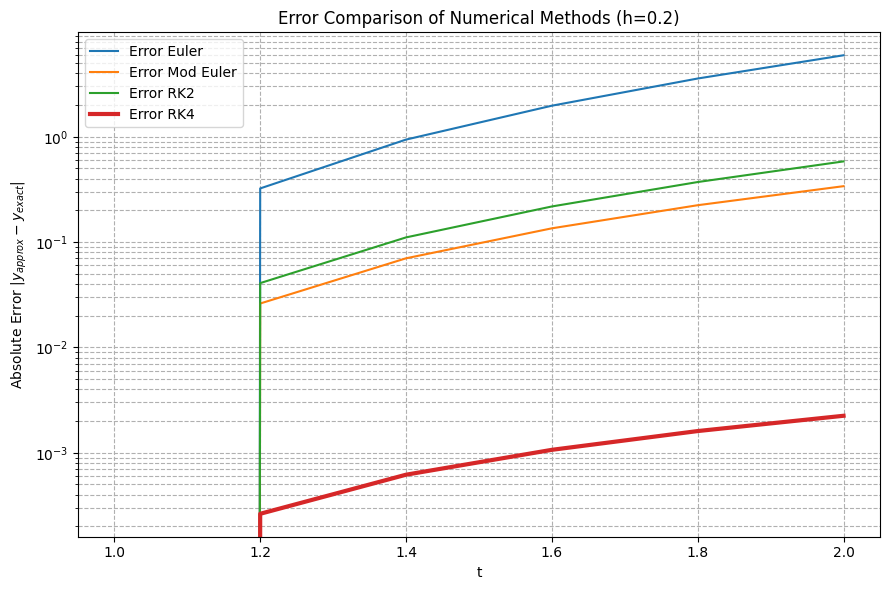

In [ ]:
from math import exp, e
import matplotlib.pyplot as plt

# ------------------------------------------------------------
# Differential equation: y' = (2/t)y + t^2 * e^t
# ------------------------------------------------------------
def f(t, y):
    # The DE is defined for t in [1, 2], so 2/t is safe.
    return (2/t) * y + (t**2) * exp(t)


# ------------------------------------------------------------
# Exact solution: y(t) = t^2 * (e^t - e)
# ------------------------------------------------------------
def exact(t):
    return (t**2) * (exp(t) - e)


# ------------------------------------------------------------
# Numerical Methods
# ------------------------------------------------------------

def euler(t, y, h):
    """First-order Euler method."""
    return y + h * f(t, y)

def modified_euler(t, y, h):
    """Second-order Modified Euler (Heun's) method."""
    k1 = f(t, y)
    y_predict = y + h * k1
    k2 = f(t + h, y_predict)
    return y + (h/2) * (k1 + k2)

def rk2(t, y, h):
    """Second-order Runge-Kutta method (Midpoint)."""
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    return y + h * k2

def rk4(t, y, h):
    """Fourth-order Runge-Kutta method."""
    k1 = f(t, y)
    k2 = f(t + h/2, y + (h/2) * k1)
    k3 = f(t + h/2, y + (h/2) * k2)
    k4 = f(t + h, y + h * k3)
    return y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)


# ------------------------------------------------------------
# Simulation Parameters
# ------------------------------------------------------------

h = 0.2
t0 = 1.0      # Start time is t=1
t_end = 2.0   # End time is t=2
y0 = exact(t0) # Initial condition y(1) = 1^2 * (e^1 - e) = 0

# Initial values for each method
y_euler = y0
y_meuler = y0
y_rk2 = y0
y_rk4 = y0

# Prepare for table generation
t = t0

# ------------------------------------------------------------
# Header Printing
# ------------------------------------------------------------

print("---------------------------------------------------------------------------------------")
print("ti     exact     Euler   ModEuler    RK2      RK4    er_Euler er_MEuler er_RK2 er_RK4")
print("---------------------------------------------------------------------------------------")

# ------------------------------------------------------------
# Table Generation Loop
# ------------------------------------------------------------

while t <= t_end + 1e-9: # 1e-9 tolerance for float comparison

    y_true = exact(t)

    # Compute errors
    er_euler = abs(y_euler - y_true)
    er_me = abs(y_meuler - y_true)
    er_rk2 = abs(y_rk2 - y_true)
    er_rk4 = abs(y_rk4 - y_true)

    # Print row in aligned format (using f-strings for precision)
    print(f"{t:3.1f}  {y_true:7.4f}  {y_euler:7.4f}  {y_meuler:7.4f}  {y_rk2:7.4f}  {y_rk4:7.4f}  "
          f"{er_euler:7.4f}  {er_me:7.4f}  {er_rk2:7.4f}  {er_rk4:7.4f}")

    # Advance all methods for next step (using the values from the current time step t)
    y_euler = euler(t, y_euler, h)
    y_meuler = modified_euler(t, y_meuler, h)
    y_rk2 = rk2(t, y_rk2, h)
    y_rk4 = rk4(t, y_rk4, h)

    t += h

print("---------------------------------------------------------------------------------------")
print(f"\nExact solution: y(t) = t^2 * (e^t - e)")
print(f"Differential Equation: y' = (2/t)y + t^2 * e^t\n")

# ================================================================
#                  PLOTTING SECTION
# ================================================================

# Recompute all values for plotting (clean arrays)

t_values = []
exact_values = []
euler_values = []
meuler_values = []
rk2_values = []
rk4_values = []

er_euler_values = []
er_meuler_values = []
er_rk2_values = []
er_rk4_values = []

t = t0
y_euler = exact(t)
y_meuler = exact(t)
y_rk2 = exact(t)
y_rk4 = exact(t)

while t <= t_end + 1e-9:

    y_true = exact(t)

    # store solutions
    t_values.append(t)
    exact_values.append(y_true)
    euler_values.append(y_euler)
    meuler_values.append(y_meuler)
    rk2_values.append(y_rk2)
    rk4_values.append(y_rk4)

    # store errors
    er_euler_values.append(abs(y_euler - y_true))
    er_meuler_values.append(abs(y_meuler - y_true))
    er_rk2_values.append(abs(y_rk2 - y_true))
    er_rk4_values.append(abs(y_rk4 - y_true))

    # advance
    y_euler = euler(t, y_euler, h)
    y_meuler = modified_euler(t, y_meuler, h)
    y_rk2 = rk2(t, y_rk2, h)
    y_rk4 = rk4(t, y_rk4, h)

    t += h


# ------------------------------------------------------------
# Plot 1: Exact vs All Numerical Methods
# ------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(t_values, exact_values, label="Exact Solution", linewidth=3, color='black')
plt.plot(t_values, euler_values, label="Euler", linestyle='--')
plt.plot(t_values, meuler_values, label="Modified Euler", linestyle=':')
plt.plot(t_values, rk2_values, label="RK2", linestyle='-.')
plt.plot(t_values, rk4_values, label="RK4")

plt.xlabel("t")
plt.ylabel("y(t)")
plt.title("Comparison of Numerical Methods for $y' = (2/t)y + t^2 e^t$")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


# ------------------------------------------------------------
# Plot 2: Errors of Each Method
# ------------------------------------------------------------
plt.figure(figsize=(9,6))
plt.plot(t_values, er_euler_values, label="Error Euler")
plt.plot(t_values, er_meuler_values, label="Error Mod Euler")
plt.plot(t_values, er_rk2_values, label="Error RK2")
plt.plot(t_values, er_rk4_values, label="Error RK4", linewidth=3)

plt.xlabel("t")
plt.ylabel("Absolute Error $|y_{approx} - y_{exact}|$")
plt.title("Error Comparison of Numerical Methods (h=0.2)")
plt.yscale('log') # Log scale helps distinguish the higher order method errors
plt.grid(True, which="both", ls="--")
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
from sympy import Function, dsolve, Eq, diff, symbols, exp

# Define variable and function
t = symbols('t')
y = Function('y')

# Define the differential equation: y' = (2/t)y + t^2 e^t
ode = Eq(diff(y(t), t), (2/t)*y(t) + t**2 * exp(t))

# Initial condition y(1) = 0
ic = {y(1): 0}

# Solve ODE
ySol = dsolve(ode, ics=ic)

print("Exact solution with IC:")
print(ySol)


Exact solution with IC:
Eq(y(t), t**2*(exp(t) - E))


In [ ]:
# =============================
#  Numerical Differentiation
#  CLEAN & SEPARATED VERSION
# =============================

import numpy as np

# ----------------------------------------------
# 1. 3‑Point Formulas (Function Given)
# ----------------------------------------------

def df_3fdpts(x, f, h):  # forward
    J = []
    for i in range(len(x) - 2):
        val = (1 / (2 * h)) * (-3 * f(x[i]) + 4 * f(x[i] + h) - f(x[i] + 2 * h))
        J.append(val)
    return J

def df_3bdpts(x, f, h):  # backward
    K = []
    for i in range(len(x) - 1, 1, -1):
        val = (-1 / (2 * h)) * (-3 * f(x[i]) + 4 * f(x[i] - h) - f(x[i] - 2 * h))
        K.append(val)
    return K

def df_3ctrpts(x, f, h):  # central
    L = []
    for i in range(1, len(x) - 1):
        val = (1 / (2 * h)) * (f(x[i + 1]) - f(x[i - 1]))
        L.append(val)
    return L

# ----------------------------------------------
# 2. 3‑Point Formulas (Data Points Only)
# ----------------------------------------------

def df_3fdpts_data(x, y, h):  # forward
    J = []
    for i in range(len(x) - 2):
        val = (1 / (2 * h)) * (-3 * y[i] + 4 * y[i + 1] - y[i + 2])
        J.append(val)
    return J

def df_3bdpts_data(x, y, h):  # backward
    K = []
    for i in range(2, len(x)):
        val = (1 / (2 * h)) * (y[i - 2] - 4 * y[i - 1] + 3 * y[i])
        K.append(val)
    return K

def df_3ctrpts_data(x, y, h):  # central
    L = []
    for i in range(1, len(x) - 1):
        val = (1 / (2 * h)) * (y[i + 1] - y[i - 1])
        L.append(val)
    return L

# ----------------------------------------------
# 3. 5‑Point Formulas (Function Given)
# ----------------------------------------------

def df_5fdpts(x, f, h):  # forward
    J = []
    for i in range(len(x) - 4):
        val = (1 / (12 * h)) * (-25*f(x[i]) + 48*f(x[i]+h) - 36*f(x[i]+2*h) + 16*f(x[i]+3*h) - 3*f(x[i]+4*h))
        J.append(val)
    return J

def df_5bdpts(x, f, h):  # backward
    K = []
    for i in range(len(x) - 1, 3, -1):
        val = (-1 / (12 * h)) * (-25*f(x[i]) + 48*f(x[i]-h) - 36*f(x[i]-2*h) + 16*f(x[i]-3*h) - 3*f(x[i]-4*h))
        K.append(val)
    return K

def df_5ctrpts(x, f, h):  # central
    L = []
    for i in range(2, len(x) - 2):
        val = (1 / (12 * h)) * (f(x[i-2]) - 8*f(x[i-1]) + 8*f(x[i+1]) - f(x[i+2]))
        L.append(val)
    return L

# ----------------------------------------------
# 4. 5‑Point Formulas (Data Points Only)
# ----------------------------------------------

def df_5fdpts_data(x, y, h):
    J = []
    for i in range(len(x) - 4):
        val = (1 / (12 * h)) * (-25*y[i] + 48*y[i+1] - 36*y[i+2] + 16*y[i+3] - 3*y[i+4])
        J.append(val)
    return J

def df_5bdpts_data(x, y, h):
    K = []
    for i in range(4, len(x)):
        val = (1 / (12 * h)) * (3*y[i-4] - 16*y[i-3] + 36*y[i-2] - 48*y[i-1] + 25*y[i])
        K.append(val)
    return K

def df_5ctrpts_data(x, y, h):
    L = []
    for i in range(2, len(x) - 2):
        val = (1 / (12 * h)) * (y[i-2] - 8*y[i-1] + 8*y[i+1] - y[i+2])
        L.append(val)
    return L

# ----------------------------------------------
# 5. Second Derivatives (Function & Data)
# ----------------------------------------------

def dff_3ctrpts(x, f, h):  # function
    L = []
    for i in range(1, len(x) - 1):
        val = (1 / h**2) * (f(x[i+1]) + f(x[i-1]) - 2*f(x[i]))
        L.append(val)
    return L

def dff_03ctrpts(x, y, h):  # data only
    Z = []
    for i in range(1, len(x) - 1):
        val = (1 / h**2) * (y[i+1] + y[i-1] - 2*y[i])
        Z.append(val)
    return Z

## Usage Examples

### Example: Three‑Point Forward Difference (First Derivative)
```python
def f(x):
    return x**3 + 2*x + 1

x0 = 1.0
h = 0.1
result = D3forward(f, x0, h)
print("3‑Point Forward Derivative at x=1:", result)
```

### Example: Three‑Point Backward Difference
```python
result = D3backward(f, x0, h)
print("3‑Point Backward Derivative at x=1:", result)
```

### Example: Three‑Point Central Difference
```python
result = D3central(f, x0, h)
print("3‑Point Central Derivative at x=1:", result)
```

---

### Example: Five‑Point Forward Difference
```python
result = D5forward(f, x0, h)
print("5‑Point Forward Derivative at x=1:", result)
```

### Example: Five‑Point Backward Difference
```python
result = D5backward(f, x0, h)
print("5‑Point Backward Derivative at x=1:", result)
```

### Example: Five‑Point Central Difference
```python
result = D5central(f, x0, h)
print("5‑Point Central Derivative at x=1:", result)
```

---

### Example: Second Derivative Using Three‑Point Formula
```python
result = second_derivative_3point(f, x0, h)
print("Second Derivative (3‑point) at x=1:", result)
```

### Example: Second Derivative Using Five‑Point Formula
```python
result = second_derivative_5point(f, x0, h)
print("Second Derivative (5‑point) at x=1:", result)
```

---

### Example: Using Data Points Instead of Functions (Five‑Point)
```python
xs = [0.8, 0.9, 1.0, 1.1, 1.2]
ys = [f(x) for x in xs]
ih = 1  # index of x = 1.0
h = 0.1

result = five_point_derivative_data(xs, ys, ih, h)
print("Derivative from Data (5‑point) at x=1:", result)
```



SyntaxError: invalid syntax (ipython-input-2183266454.py, line 129)